In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential, load_model
import keras

In [3]:
train_images = pd.read_csv("input/emnist/emnist-balanced-train.csv", header=None)
test_images = pd.read_csv("input/emnist/emnist-balanced-test.csv",header=None)
map_images = pd.read_csv("input/emnist/emnist-balanced-mapping.txt",header=None) 

In [4]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


a


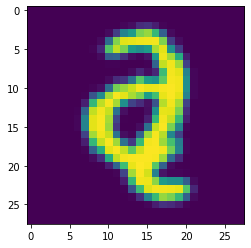

In [5]:
plt.imshow(np.rot90(np.fliplr(train_images.iloc[1,1:].values.reshape(28,28)))) ## We'll learn about this later
print(chr(97)) # 36 in labels column maps to 36 --> 97 in map_imagesx

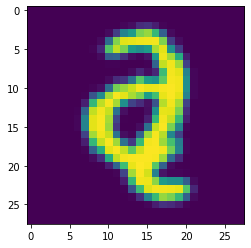

In [6]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values

# ascii_map just for the convenince, i've removed the first column in map_images.
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# Uncomment the below line to know about the labels present in our dataset
# for i in ascii_map: 
#     print(chr(int(i)))
plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

In [7]:
# The images in train_images are not in a proper orientation,hence to make them appropriate for training & testing data.

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image


(112800, 28, 28)

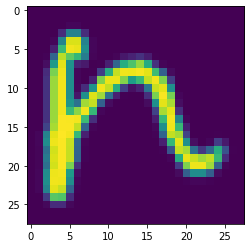

In [8]:
train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
plt.imshow(train_x[2])
train_x.shape

In [9]:
train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)


In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

In [11]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [12]:
history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 20,
)


Epoch 1/20
3525/3525 [==============================] - 56s 16ms/step - loss: 1.0116 - accuracy: 0.6928 - val_loss: 0.4905 - val_accuracy: 0.8370
Epoch 2/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.6379 - accuracy: 0.7908 - val_loss: 0.4260 - val_accuracy: 0.8504
Epoch 3/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.5571 - accuracy: 0.8137 - val_loss: 0.4043 - val_accuracy: 0.8602
Epoch 4/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.5106 - accuracy: 0.8271 - val_loss: 0.3949 - val_accuracy: 0.8680
Epoch 5/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.4768 - accuracy: 0.8367 - val_loss: 0.3860 - val_accuracy: 0.8706
Epoch 6/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.4542 - accuracy: 0.8419 - val_loss: 0.3764 - val_accuracy: 0.8699
Epoch 7/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.4362 - accuracy: 0.8477 - val_loss: 0.3751 -

In [13]:
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])


# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)))
# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)

In [14]:
ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("mapping.csv",index=False,header=True)

In [17]:
from keras.models import load_model

model.save('EMNIST-Balanced-Model.h5')
model = load_model("EMNIST-Balanced-Model.h5")

ModuleNotFoundError: No module named 'load_model'

In [16]:
from keras.preprocessing import image
import cv2

img_sh_lst = []
img = image.load_img("input/alphabet-prediction-set/download.png",target_size=(28,28))
x = image.img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'